In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(181,182)]
i =0
result = np.zeros((1,62,700))

In [3]:
for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        #cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0323-09.aice.nc
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        #plotvar = data.variables['SALT'][0,:,426,600:1400] #60S
        #plotvar = data.variables['SALT'][0,:,375,600:1400] #62.5S
        plotvar = data.variables['SALT'][0,:,319,500:1200] #65S
        #plotvar = data.variables['HMXL'][0,:,:]
        #lont = data.variables['lont_bounds'][:,:,0]
        #latt = data.variables['latt_bounds'][:,:,0]
        #lont = lont[248:344,700:1400]
        #latt = latt[248:344,700:1400]
        plotvar = plotvar[:,:]
#       lont = lont[180:320,500:1200]
#        latt = latt[180:320,500:1200]
#        plotvar = plotvar[180:320,500:1200]
        aveplot = plotvar
        
        result[i] = aveplot
        
        i = i + 1

In [4]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,:]
        lontu = datau.variables['ULONG'][:,200]
        lattu = datau.variables['ULAT'][:,200]

In [5]:
#B=lattu

In [6]:

re = np.nanmean(result,axis=0)
re[re <  0] = np.nan
re[re > 50] = np.nan

In [7]:
#A = np.arange(62)
B = np.arange(700)
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1/z_t.nc')
A = data1.variables['z_t'][:]/100
#B = np.arange(601)
#B= lontu
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'15'}
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
lev_cmap = nice_cmap([1,10,20,30,50,60,70,80,90,100,110,130,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")

nice_levels = [34,34.2,34.4,34.5,34.6,34.65,34.66,34.67,34.68,34.69,34.70,34.71,34.72,34.75,34.78,34.8,34.82]
nice_levels = [34.64,34.642,34.644,34.646,34.648,34.65,34.652,34.654,34.656,34.658,34.66,34.662,34.664,34.666]
#nice_levels = [34.65,34.652,34.654,34.656,34.658,34.66,34.662,34.664,34.666,34.668,34.67]
#nice_levels = [34.60,34.65,34.66,34.67,34.68,34.69,34.70,34.71,34.72,34.73,34.74,34.75,34.76,34.77,34.78]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
#********************************************************************
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


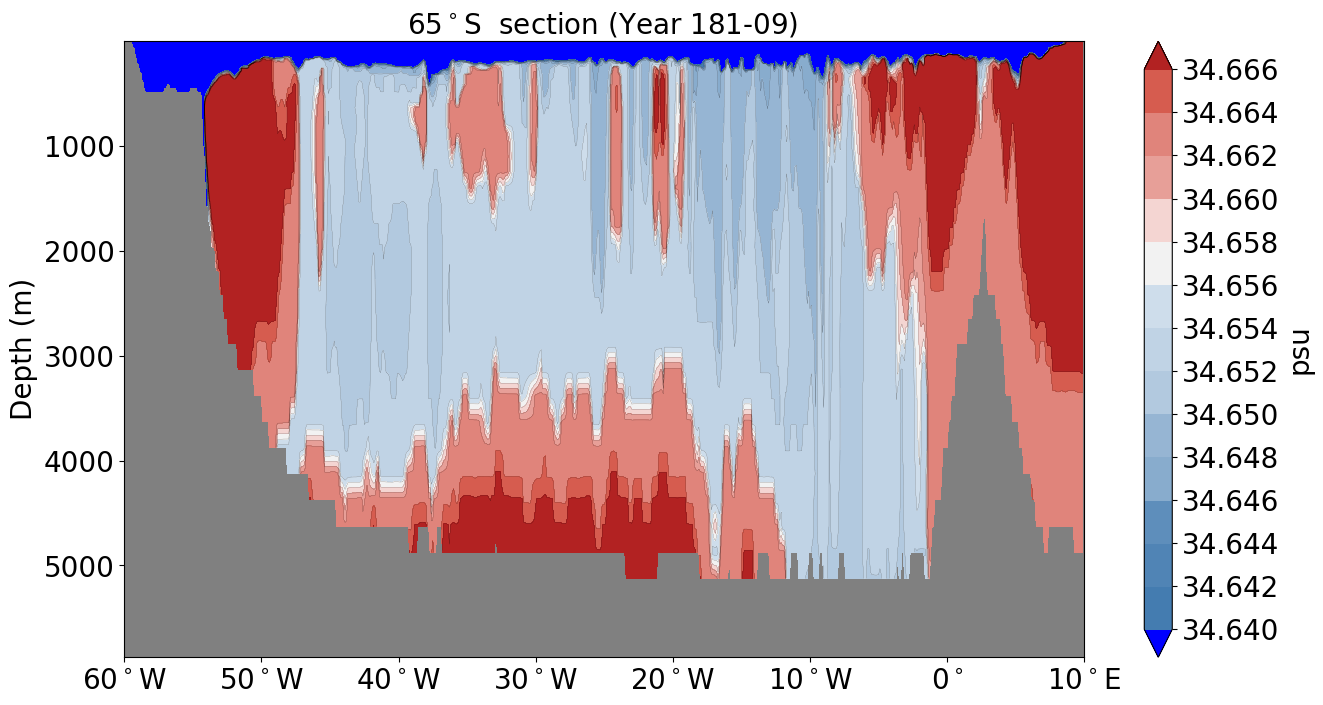

In [8]:
# plot the result
my_font = {'fontname':'Cambria', 'size':'20'}
fig = plt.figure(figsize=(15, 7.7), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#im = ax0.contourf(xx, yy, plotvar,cmap=new_cmap)
im = ax0.contourf(xx[:,:], yy[:,:], re[:,:],cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
CS = ax0.contour(xx[:,:], yy[:,:], re[:,:],nice_levels,colors = 'black', linestyles = 'solid',linewidths=0.1)
ax0.set_facecolor("grey")
im.cmap.set_over("firebrick")
im.cmap.set_under("blue")
#plt.clabel(CS, inline=1, fontsize=9)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.set_label('psu', **my_font)
cbar.ax.tick_params(labelsize=20)
ax0.set_title('65$^\circ$S  section (Year 181-09) ',**my_font)
#############################################################################
##设定X坐标值
plt.xticks(range(0,701,100), ['60$^\circ$W','50$^\circ$W','40$^\circ$W', '30$^\circ$W', '20$^\circ$W','10$^\circ$W','0$^\circ$', '10$^\circ$E', '20$^\circ$E','30$^\circ$E','40$^\circ$E'],**my_font)
plt.yticks(**my_font)#range(0,46,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968'])#,'3133','4375','5625'])

#plt.xlabel('Latitude ($^\circ$E)',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
plt.savefig("temperature-cross300-444.png")